In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data_path = "kmeans_data.csv"
df = pd.read_csv(data_path)

In [10]:
df = df.apply(pd.to_numeric, errors='coerce')
X = df.to_numpy()
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [15]:
def k_means(X, k, max_iters=100):
    np.random.seed(42)  # For reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
     
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
     
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
      
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels

In [12]:
labels_2 = k_means(X, k=2)
labels_3 = k_means(X, k=3)

In [7]:
cluster_colors_2 = ['lightblue', 'red'] 
cluster_colors_3 = ['lightblue', 'red', 'lightgreen'] 

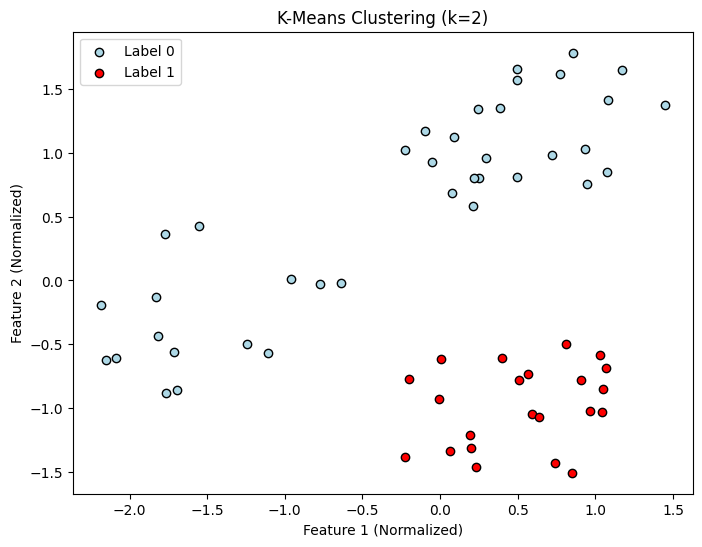

In [13]:
# Plot results for k=2
plt.figure(figsize=(8, 6))
for i in range(2):
    plt.scatter(X[labels_2 == i, 0], X[labels_2 == i, 1], c=cluster_colors_2[i], label=f'Label {i}', edgecolor='k')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('K-Means Clustering (k=2)')
plt.legend()
plt.show()

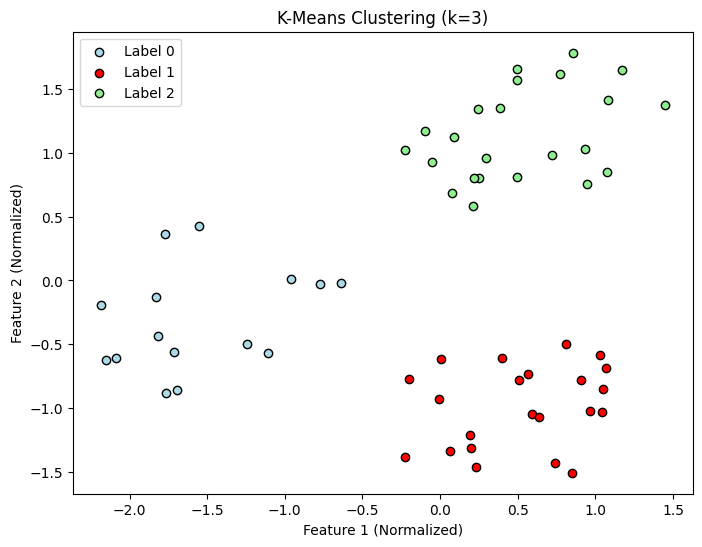

In [14]:
# Plot results for k=3
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X[labels_3 == i, 0], X[labels_3 == i, 1], c=cluster_colors_3[i], label=f'Label {i}', edgecolor='k')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.show()